# Module 5 Deep Learning Methods

## Introduction to deep learning
 
Deep learning is a subset of machine learning, where the fundamental model structure is a network of inputs, hidden layers, and outputs, as shown below.

![](images/neural_network01.jpg)

A network can have one or more hidden layers. 

The original motivation of deep learning was to create models inspired by how the human brain learns: **through interconnected cells called neurons**.
This is the reason why we continue to call deep learning models as **neural networks**. There are a number of libraries and frameworks for deep learning in python.

These are:

*   `Tensorflow`: an open-source library for numerical computation and machine learning.
*   `Keras`: a high-level neural network API that runs on top of TensorFlow, mxnet, or Theano.
*   `Apache mxnet`: a scalable and flexible deep learning framework that supports multiple languages and devices.
*   `Caffe`: a fast and modular framework for deep learning, mainly used for computer vision.
*   `Theano`: a Python library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays.
*   `sklearn-theano`: a library that wraps some of the scikit-learn API with Theano expressions.
*   `Chainer`: a Python-based framework for deep learning that supports dynamic computation graphs.
*   `Lasagne`: a lightweight library that builds on top of Theano to provide neural network layers and utilities.
*   `PyTorch`: a Python package that provides tensor computation and dynamic neural networks.

In this course we'll focus on PyTorch. It is being used by deep learning engineers in industry and it is a favored tool amongst researchers. 
Many deep learning papers are published using PyTorch. PyTorch is designed to be intuitive and user-friendly, sharing a lot of common ground with the Python library NumPy.

**Comparing machine learning and deep learning**
    
*  Machine learning and deep learning can both be described as artificial intelligence. 
*  In both cases, a computer system learns from data to make intelligent decisions. 
*  However, deep learning diverges from machine learning in many different aspects.

![](images/ML_vs_DL.png)

In [1]:
#!pip install torch
import torch

## 5.1 Tensors in pytorch

In [2]:
import torch

# tensors in pytorch
array = [[1, 2, 3], [4, 5, 6]]
tensor_input = torch.tensor(array)
print(tensor_input)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [3]:
# some of the tensor attributes and functions
print("tensor_input.data: \n", tensor_input.data)
print("tensor_input.shape: ", tensor_input.shape)
print("tensor_input.device: ",tensor_input.device)
print("tensor.dtype: ",tensor_input.dtype)

tensor_input.data: 
 tensor([[1, 2, 3],
        [4, 5, 6]])
tensor_input.shape:  torch.Size([2, 3])
tensor_input.device:  cpu
tensor.dtype:  torch.int64


In [4]:
# check that your GPU is working in Pytorch
print(torch.cuda.is_available())

True


In [5]:
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

In [6]:
transpose = tensor_input.t().to(dev)
print(transpose)

tensor([[1, 4],
        [2, 5],
        [3, 6]], device='cuda:0')


In [7]:
print(tensor_input.device)
print(transpose.device)

cpu
cuda:0


In [8]:
# creating a tensor of rank 3
torch.manual_seed(0)
tensor3R = torch.randn(3,128,128, device = "cuda")
print(tensor3R.device)
print(tensor3R.shape)

cuda:0
torch.Size([3, 128, 128])


### 5.1.1 Tensor operations

In [9]:
# compatible shapes
a = torch.tensor([[1, 1], [2, 2]])
b = torch.tensor([[2, 2], [3, 3]])
print("tensor addition: \n",a + b, "\n")    
print("tensor subtraction: \n",a - b)        

tensor addition: 
 tensor([[3, 3],
        [5, 5]]) 

tensor subtraction: 
 tensor([[-1, -1],
        [-1, -1]])


In [10]:
# incompatible shapes
a = torch.tensor([[1, 1], [2, 2]])
c = torch.tensor([[2, 2, 4], [3, 3, 5]])

# print(a + c)
## RuntimeError                              Traceback (most recent call last)
## Cell In[10], line 5
##      2 a = torch.tensor([[1, 1], [2, 2]])
##      3 c = torch.tensor([[2, 2, 4], [3, 3, 5]])
##----> 5 print(a + c)

## RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

In [11]:
d = torch.tensor(5)
print(d)
print(d.shape)

tensor(5)
torch.Size([])


In [12]:
print(a)
print(a + 5)
print(a + d)

tensor([[1, 1],
        [2, 2]])
tensor([[6, 6],
        [7, 7]])
tensor([[6, 6],
        [7, 7]])


In [13]:
5 == torch.tensor(5)

tensor(True)

In [14]:
# element-wise multiplication
print(a)
print(b)
print(a * b)

tensor([[1, 1],
        [2, 2]])
tensor([[2, 2],
        [3, 3]])
tensor([[2, 2],
        [6, 6]])


In [15]:
# dot product
a @ b

tensor([[ 5,  5],
        [10, 10]])

In [16]:
torch.manual_seed(0)
a = torch.arange(120.).reshape(5, 4, 6)
b = torch.arange(24.).reshape(6, 4)
# c = (a @ b).to(dev)
c = a @ b
print(c)

tensor([[[ 220.,  235.,  250.,  265.],
         [ 580.,  631.,  682.,  733.],
         [ 940., 1027., 1114., 1201.],
         [1300., 1423., 1546., 1669.]],

        [[1660., 1819., 1978., 2137.],
         [2020., 2215., 2410., 2605.],
         [2380., 2611., 2842., 3073.],
         [2740., 3007., 3274., 3541.]],

        [[3100., 3403., 3706., 4009.],
         [3460., 3799., 4138., 4477.],
         [3820., 4195., 4570., 4945.],
         [4180., 4591., 5002., 5413.]],

        [[4540., 4987., 5434., 5881.],
         [4900., 5383., 5866., 6349.],
         [5260., 5779., 6298., 6817.],
         [5620., 6175., 6730., 7285.]],

        [[5980., 6571., 7162., 7753.],
         [6340., 6967., 7594., 8221.],
         [6700., 7363., 8026., 8689.],
         [7060., 7759., 8458., 9157.]]])


## 5.2 Simple neural network

In [17]:
import torch
import torch.nn as nn

### 5.2.1 My first neural network in PyTorch

In [18]:
torch.manual_seed(0)
input_tensor = torch.Tensor([[2, 3, 6]])

# Implement a small neural network with exactly two linear layers
model = nn.Sequential(nn.Linear(3,1))
output = model(input_tensor)
print(output)

tensor([[-2.3555]], grad_fn=<AddmmBackward0>)


In [19]:
# weights and biases 
print("input_tensor =\n", input_tensor)
print("\nH0_weights =\n", model[0].weight)
print("\nH0_bias =\n", model[0].bias)

# linear combination of weights and bias
print("\nOutput:", input_tensor @ model[0].weight.t() + model[0].bias)

input_tensor =
 tensor([[2., 3., 6.]])

H0_weights =
 Parameter containing:
tensor([[-0.0043,  0.3097, -0.4752]], requires_grad=True)

H0_bias =
 Parameter containing:
tensor([-0.4249], requires_grad=True)

Output: tensor([[-2.3555]], grad_fn=<AddBackward0>)


!["First Neural Network"](images/simple_neural_network_01.png)

In [20]:
# Number of parameters in the one hidden layer network
model[0].weight.numel() + model[0].bias.numel()

4

### 5.2.2 My second neural network in PyTorch

In [21]:
torch.manual_seed(0)
nn2_input = torch.Tensor([[2, 3, 6, 4]])

# Implement a small neural network with exactly two linear layers
nn2_model = nn.Sequential(
    nn.Linear(4,3),
    nn.Linear(3,2))
nn2_output = nn2_model(nn2_input)
print(nn2_output)

tensor([[0.2638, 0.7427]], grad_fn=<AddmmBackward0>)


In [22]:
# Computing the output of the first layer
H0_input = nn2_input
H0_output = H0_input @ nn2_model[0].weight.t() + nn2_model[0].bias
H0_output

tensor([[-3.6215,  1.2123, -1.1977]], grad_fn=<AddBackward0>)

In [23]:
# Computing the output of the 2nd layer
H1_input = H0_output
H1_output = H1_input @ nn2_model[1].weight.t() + nn2_model[1].bias
H1_output

tensor([[0.2638, 0.7427]], grad_fn=<AddBackward0>)

In [24]:
#nn2_output == H1_output
total_weights = sum([nn2_model[i].weight.numel() for i in range(len(list(nn2_model.children())))])
total_biases = sum([nn2_model[i].bias.numel() for i in range(len(list(nn2_model.children())))])

print("total weights =", total_weights)
print("total biases =", total_biases)
print("total trainable parameters =", total_weights + total_biases)

total weights = 18
total biases = 5
total trainable parameters = 23


!["Second Neural Network"](images/simple_neural_network_02.png)

## 5.3 Activation function

**Linear layers** are not the only layer type we can add to a network. We can use **activation functions** to add non-linearity to a network.

This non-linearity grants networks the ability to learn more complex interactions between inputs `X` and targets `y` than only linear relationships. 

 The output will no longer be a linear function of the input. 
 
 We'll call the output of the last linear layer the **"pre-activation" output**, which we'll pass to activation functions to obtain transformed output.

![](images/neural_network_with_activation_function.png)

### 5.3.2 Sigmoid function

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve.

$$\sigma(x)=\dfrac{1}{1+e^{-x}} = \dfrac{e^{x}}{1+ e^{x}} = 1 - \sigma(-x)$$

Its derivative is

$$\sigma'(x)= \sigma(x)\sigma(-x)$$

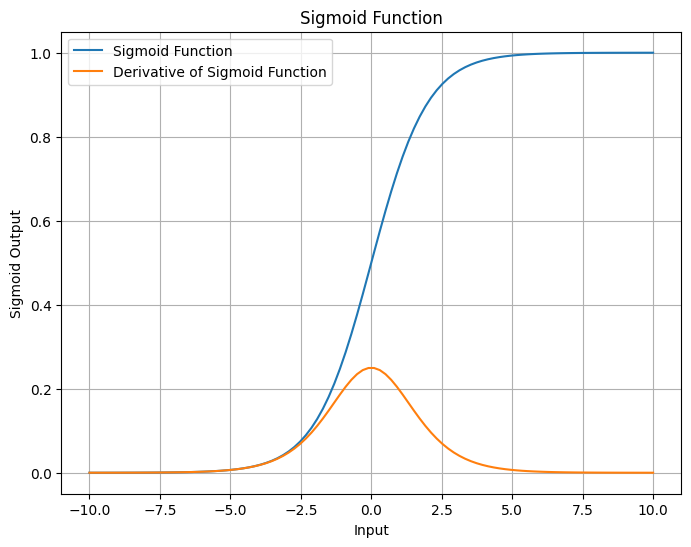

In [55]:
import torch
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Generate input values
x = torch.linspace(-10, 10, 100)  # Values from -10 to 10

# Calculate sigmoid output values
y = sigmoid(x)

# gradient of x
y_prime = sigmoid(x) * sigmoid(-x)
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.plot(x, y_prime, label = "Derivative of Sigmoid Function")
plt.xlabel('Input')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()

In binary classification task, to predict whether an animal is `1` (a mammal) or `0` (not a mammal), we do the following steps.

1) we take the pre-activation output,
2) pass it to the sigmoid, and
3) obtain a value between 0 and 1,

Using the common threshold of 0.5
* if output > 0.5, then class label = 1 (a mammal)
* if output <= 0.5, then class label = 0 (not a mammal).

In [26]:
# implementing sigmoid in pytorch
import torch
import torch.nn as nn
pre_activation = torch.tensor([[5, 4, -2, .3, -1]])
sigmoid = nn.Sigmoid()
output = sigmoid(pre_activation)
print(output)

tensor([[0.9933, 0.9820, 0.1192, 0.5744, 0.2689]])


In [27]:
output > 0.5

tensor([[ True,  True, False,  True, False]])

In [28]:
predict = (output > 0.5).float()
predict

tensor([[1., 1., 0., 1., 0.]])

**The sigmoid function as the last step in neural network**
    
The sigmoid is commonly used as the last step in a neural network when performing binary classification.
A sigmoid as the last step in a network of only linear layers is equivalent to a logistic regression using traditional machine learning.

### 5.3.3  The Softmax activation function

We use the `sigmoid` activation function for binary classification. 

For multiclass classification, involving more than two class labels, we use `softmax`, another popular activation function.

The Softmax function is defined as:

$$\text{Softmax}(x_i) = \dfrac{e^{x_i}}{\sum{e^{x_j}}}$$

Its partial derivative with respect to $x_i$ is
$$\dfrac{\partial{\,\text{Softmax}(x_i)}}{\partial{x_i}} = \text{Softmax}(x_i) \left(1 - \text{Softmax}(x_i) \right)$$

**Example**

Suppose that there are $N=3$ classes. 

1) **Class 0** for bird,
2) **Class 1** for mammal, and
3) **Class 2** for reptile.

So the output has 3 elements which means that Softmax has 3 elements.

The output is a probability distribution since element is a probability and the sum of the output is equal to `1`.

softmax can be the last layer in `nn.Sequential`.

![](images/softmax_example.png)

In [67]:
import torch
import torch.nn as nn

# create the preactivation output
pre_activation = torch.tensor([[4.3, 6.1, 2.3]])

# Apply softmax along the last dimension (dim = -1)
probabilities = nn.Softmax(dim = -1)
output = probabilities(pre_activation)

print("output = ", np.round(output.reshape(3,).tolist(), 4))
print("sum of probabilities =", float(output.sum()))

output =  [0.1392 0.842  0.0188]
sum of probabilities = 1.0


## 5.4 Forward Pass

Generating a prediction  from the neural network models is is called **running a forward pass** through a=the network.

When we pass input data through a neural network in the forward direction to generate outputs, or predictions, the input data flows through the model layers. 

At each layer, computations performed on the data generate intermediate representations, which are passed to each subsequent layer until the final output is generated.

The purpose of the forward pass is to propagate input data through the network and produce predictions or outputs based on the model's learned parameters (**weights** and **biases**). 

This is used for both training and generating new predictions. 

The final output can be **binary classifications**, **multi-class classifications**, or **numerical predictions** (**regressions**).

### 5.4.1 Binary classification: forward pass

* `Class = 1`, the observation observed is a mammal
* `Class = 0`, the animal observed is not a mammal

In [68]:
# Create input data of shape (5,6)
torch.manual_seed(0)
input_data = torch.randn(5,6) # input data has 5 observations and 6 features

# Create a binary classification model (bc_model)
bc_model = nn.Sequential(
    nn.Linear(6, 5), # First linear layer (Hidden)
    nn.Linear(5, 1), # Second Linear Layer (Hidden)
    nn.Sigmoid() # Sigmoid activation function
)

# Pass the bc_input data through the bc_model
bc_output = bc_model(input_data)

print(bc_output)

tensor([[0.3796],
        [0.3907],
        [0.5054],
        [0.3692],
        [0.5270]], grad_fn=<SigmoidBackward0>)


In [31]:
bc_prediction = bc_output > 0.5
bc_prediction.t()

tensor([[False, False,  True, False,  True]])

In [32]:
bc_prediction.float()

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

### 5.4.2 Multi-class classification: forward pass

Suppose we are predicting three classes: `0` for **mammal**, `1` for **bird** or `2` for **reptile**. 

We specify our model has three classes, setting this value as the last linear layer's output dimension. 

We use `softmax` instead of `sigmoid`, with `dim = -1` to indicate the five samples have the same last dimension as the last linear layer's output. 

Let's use the same input as before. 

*  The output shape is `(5,3)`.
*  Each row sums to `1`.
*  Value with the highest probability is assigned predicted label in each row.

In [33]:
torch.manual_seed(0)

# Specify model has 3 classes
n_classes = 3

# Create a multi-class classification model (mc_model)
mc_model = nn.Sequential(
    nn.Linear(6, 5), # First Linear layer (hidden)
    nn.Linear(5, n_classes), # Second linear layer (hidden)
    nn.Softmax(dim = -1)  # Softmax activation
)

# Pass the mc_input through the mc_model
mc_output = mc_model(input_data)
print(mc_output.shape)

torch.Size([5, 3])


In [34]:
print(mc_output)

tensor([[0.3898, 0.3416, 0.2686],
        [0.4191, 0.3383, 0.2426],
        [0.1878, 0.4429, 0.3692],
        [0.2340, 0.3831, 0.3829],
        [0.2728, 0.4086, 0.3186]], grad_fn=<SoftmaxBackward0>)


In [35]:
mc_prediction = torch.argmax(mc_output, dim=1).view(-1,1)
print(mc_prediction)

tensor([[0],
        [0],
        [1],
        [1],
        [1]])


### 5.4.3 Regression: forward pass

The regressio model is used to predict continuous numerical values. 

Let's say we use the same data on five animals as before, but this time are predicting weights of animals based on their properties.

There is no activation function at the end; and the last linear layer's last dimension returns an output with one feature. 

Output dimensions are five by one: five continuous values, one for each row.

In [36]:
# Create regression model
torch.manual_seed(1)

reg_model = nn.Sequential(
    nn.Linear(6, 4), # First linear layer
    nn.Linear(4,1) # Second linear layer
)

# Pass input data through the reg_model
reg_output = reg_model(input_data)

# Return reg_output
print(reg_output)

tensor([[0.3884],
        [0.4115],
        [0.6828],
        [0.8111],
        [0.3276]], grad_fn=<AddmmBackward0>)


*   For regression problems, where the output can be any real value, a common choice is to use a linear activation function in the output layer. 
    *   This means that the output is simply the weighted sum of the input without any transformation. 
    *   This allows the network to predict any value without any restriction.
 
*   However, some regression problems may have a limited range of output values, such as `[0, 1]` or `[-1, 1]`.
    *   In such cases, it may be beneficial to use a nonlinear activation function in the output layer that can map the output to the desired range.
    *   For example, a `sigmoid` function can map any real value to `[0, 1]`, and a `tanh` function can map any real value to `[-1, 1]`.

*   **Linear**: $f(x) = x$ and its derivative is $f'(x)=1$.

<br> 

*   **Sigmoid**: $\sigma(x) = \dfrac{1}{1 + e^{-x}}$ and its derivative is $\sigma'(x) = \sigma(x) \sigma(-x)$.

<br>

*   **Tanh**: $\tanh(x) = \dfrac{e^x - e^{-x}}{e^x+ e^{-x}}$  and its derivative is   $\tanh'(x) = \dfrac{4}{(e^x + e^{-x})^2}$.

### 5.4.4 Back Propagation

A **backward pass**, or **backpropagation**, is the process by which layer weights and biases are updated during training. 

All this is part of something called a **"training loop"**. 

This involves propagating data forward, comparing outputs to true values, then propagating backwards to improve each layer's weights and biases using some handy math.

We repeat several times until the model is tuned with meaningful weights and biases. 

In short, during training, the backward pass is the complementary step to the forward pass.

## 5.5 Loss functions to evaluate model predictions

* Created neural networks that
    * take inputs and
    * return predictions as outputs. 

<br>

*  We'll now assess the differences between actual values and those predicted by the network using the loss function
    * tells us how good our model is at making predictions during training. 
    * input of the loss function:  a model prediction, `y-hat`, and true label, or ground truth, `y`
    * output a floating number.
 
<br>

* Our goal is to minimize the loss.

### 5.5.1  Hot-one encoding to transform the values of the true label, `y`

If the number of  classes is `num_classes = 3`, then
1)  `[1, 0, 0]`, if `y = 0`, or
2)  `[0, 1, 0]`, if `y = 1`, or
2)  `[0, 0, 1]`, if `y = 2`.

In [70]:
import torch.nn.functional as F

print("one-hot encoding for y=0 :", F.one_hot(torch.tensor(0), num_classes = 3))
print("one-hot encoding for y=1 :", F.one_hot(torch.tensor(1), num_classes = 3))
print("one-hot encoding for y=2 :", F.one_hot(torch.tensor(2), num_classes = 3))

one-hot encoding for y=0 : tensor([1, 0, 0])
one-hot encoding for y=1 : tensor([0, 1, 0])
one-hot encoding for y=2 : tensor([0, 0, 1])


### 5.5.2 Parameters and output for the loss function

The parameters of the loss function are:

* `scores`: model prediction before the final softmax activation function
* `one_hot_target`: one-hot encoded ground truth label

Its output is `loss` a single `float`.

In [71]:
# Calculating cross entropy loss
import torch
import torch.nn as nn
import torch.nn.functional as F

y = [1]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), scores.shape[1])

# Create the cross entropy loss function
criterion = nn.CrossEntropyLoss()

# Calculate the cross entropy loss
loss = criterion(scores.double(), one_hot_label.double())
print(loss)

tensor(0.0619, dtype=torch.float64)


## 5.6 Updating the model's parameters

A model is mispredicting when loss is high, and predicting correctly when loss is low.

So we have to minimize the loss by finding the derivative of the loss function.

![](images/nn2.png)

<br>

<br>

### 5.6.1  Gradients of the weights and biases

Since **loss** is dependent on the model's parameters: **weights** and **biases**, we can minimize the loss by updating the values of these parameters using their respective gradients.

$$\dfrac{\partial{\text{loss}}}{\partial{w}} = \left(\dfrac{\partial{\text{loss}}}{\partial{\text{y\_hat}}}\right)\left( \dfrac{\partial{\text{y\_hat}}}{\partial{\text{z}}}\right)\left(\dfrac{\partial{\text{z}}}{\partial{\text{w}}}\right) = \left(\dfrac{\partial{\text{loss}}}{\partial{\text{y\_hat}}}\right)\left(\dfrac{\partial{\text{y\_hat}}}{\partial{\text{z}}}\right)\left( X \right)$$

$$\dfrac{\partial{\text{loss}}}{\partial{b}} = \left(\dfrac{\partial{\text{loss}}}{\partial{\text{y\_hat}}}\right)\left( \dfrac{\partial{\text{y\_hat}}}{\partial{\text{z}}}\right)\left(\dfrac{\partial{\text{z}}}{\partial{\text{w}}}\right) = \left(\dfrac{\partial{\text{loss}}}{\partial{\text{y\_hat}}}\right)\left(\dfrac{\partial{\text{y\_hat}}}{\partial{\text{z}}}\right)$$


*  *Updating the weight* : `weight = weight - lr * weight_grad`
*  *Updating thew bias* :   `bias = bias - lr * bias_grad`


 where
 * $\text{weight\_grad} = \dfrac{\partial\,{\text{loss}}}{\partial{w}}$
 * $\text{bias\_grad} = \dfrac{\partial\,{\text{loss}}}{\partial{b}}$
 * `lr` is the **learning rate**.

 In deep learning the learning  rate is a hyperparameter that determines the step size at which a neural network's model parameters are updated during training. 
It controls how much the model learns from each new data point.


### 5.6.2 Loss functions for classification and regression

**Binary cross entropy loss function (BCE)** for binary classification problem. In PyTorch we use (`nn.BCELoss()`)

*  it measures the difference between the predicted probabilities, `y_hat` and the true labels `y`. 

*  The formula for binary cross entropy loss is:
    
    $$L(y,p) = - [y \cdot \log{p} + (1-y)\log(1-p)]$$
    
where $L(y, p)$ is the binary cross-entropy loss, 

$
$ y is the true binary label $($0 or$ $1, and 

$$
p is the predicted probability that the instance belongs to clas$s$ with  `p = y_hat` if `y_hat > 0.5` and `1-p = y_hat` if `y_hat <= 0.5`.    
    1
Its derivative with respect to $p$ is

$$\frac{dL}{dp} = -\dfrac{y}{p} + \dfrac{1 - y}{1 - p}$$


The **BCE** is usually combined with **sigmoid** activation function.e:.



In PyTorch, the **cross-entropy loss function** is commonly used for multi-class classification problems and is typically referred to as "CrossEntropyLoss." (`nn.CrossEntropyLoss()`)

This loss function combines the `softmax function` (to convert raw scores into class probabilities) and the negative log-likelihood loss.


The formula forthe  **cross-entropy loss function**  in one observation is given by:

$$L(y, p) = - \sum_{i}^{n}  y_i  \cdot \log{p_i}$$

where $L(y, p)$ is the cross-entropy loss function,

$n$ is the number of classes

$y$  is the true multiclass label, which is a vector of one-hot encoded labels, where only the true class is $1$, and all other entries are $0$.

$p$  represents the predicted probability distribution over classes.

The `nn.CrossEntropyLoss` function automatically applies the **softmax** function to the output tensor and computes the **cross-entropy loss** between the predicted class probabilities and the true labels.

In PyTorch, for regression tasks where we want to predict continuous values rather than class labels, we typically use **mean squared error (MSE)** or **mean absolute error (MAE) loss functions**. 

*   **Mean Squared Error (MSE) Loss (L2 Loss)**:  `nn.MSELoss()`.

    *   This loss function measures the average of the squared differences between the predicted values and the true target values. 

*   **Mean Absolute Error (MAE) Loss (L1 Loss)**: ` nn.L1Loss()`.
    *    
This loss function measures the average of the absolute differences between the predicted values and the true target value
    *    . It is also suitable for regression tasks, particularly iweou want your model to be less sensitive to outliers.

In [79]:
# torch.manual_seed(12345)
input_tensor = torch.randn(1,9)
target = torch.tensor([[1., 0.]])

model = nn.Sequential(
    nn.Linear(9,2),
    nn.Sigmoid() # Sigmoid activation function                 
)

prediction = model(input_tensor)

criterion = nn.BCELoss()

# Calculate the loss
loss = criterion(prediction, target)

# Compute the gradients of the loss
loss.backward()

# Display gradients of the weight and bias tensors in order
weight0 = model[0].weight
weight0_grads = model[0].weight.grad
bias0 = model[0].bias
bias0_grads = model[0].bias.grad

In [80]:
print("weight0 = ", weight0) 
print("\nweight0_grads = \n", weight0_grads) 

weight0 =  Parameter containing:
tensor([[ 0.0149, -0.2350, -0.1835, -0.1942,  0.1139, -0.1986, -0.0073,  0.0140,
          0.2149],
        [-0.2520, -0.2288, -0.1936,  0.2333, -0.1198,  0.2812,  0.1205,  0.0422,
         -0.0025]], requires_grad=True)

weight0_grads = 
 tensor([[ 0.3549, -0.1187, -0.1154, -0.5068, -0.0791, -0.1292,  0.1526, -0.0933,
         -0.2466],
        [-0.3767,  0.1260,  0.1224,  0.5378,  0.0840,  0.1371, -0.1620,  0.0991,
          0.2618]])


In [81]:
print("bias0 = ", bias0) 
print("\nbias0_grads = \n", bias0_grads) 

bias0 =  Parameter containing:
tensor([-0.0659,  0.0418], requires_grad=True)

bias0_grads = 
 tensor([-0.3042,  0.3229])


In [82]:
# Updating the weights manually
lr = torch.tensor([0.001])
print("weight0 = \n", weight0 - lr * weight0_grads)

weight0 = 
 tensor([[ 0.0145, -0.2349, -0.1834, -0.1937,  0.1140, -0.1985, -0.0074,  0.0141,
          0.2151],
        [-0.2516, -0.2290, -0.1937,  0.2328, -0.1199,  0.2810,  0.1207,  0.0421,
         -0.0027]], grad_fn=<SubBackward0>)


### 5.6.3 The need for an optimizer

*  Some functions have one minimum and one only, called the "global" minimum. These functions are "convex". 
*  Some "non-convex" functions have more than one "local" minimum.

![](images/convex_and_non_convex_functions.png)

At a local minimum, the function value is lowest compared to nearby points, but points further away may be even lower. 

When minimizing loss functions, our goal is to find the global minimum of the non-convex function, here, when x is approximately one.

Loss functions used in deep learning are not convex! T

To find global minima of non-convex functions, we use a mechanism called "gradient descent" which is called "optimizers" in PyTorch. 

**The need for momentum**

![](images/momentum_low.png)

![](images/momentum_high.png)

In [83]:
import torch.optim as optim
# torch.manual_seed(908) # for 01
# torch.manual_seed(1) # for 11
torch.manual_seed(2)  # for 10
#torch.manual_seed(3)  # for 11
#torch.manual_seed(1000)  # for 00

input_tensor = torch.randn(1,9)
target = torch.tensor([[1., 0.]])

model = nn.Sequential(
    nn.Linear(9,2),
    nn.Sigmoid() # Sigmoid activation function                 
)

first_prediction = model(input_tensor)

criterion = nn.BCELoss()

# Calculate the loss
loss = criterion(first_prediction, target)

# Create the optimizer
optimizer = optim.SGD(model.parameters(), lr=1, momentum=1)

# Compute the gradients of the loss
#loss.backward(retain_graph=True)
loss.backward()

# Update the model's parameters using the optimizer
optimizer.step()


final_prediction = model(input_tensor)

print("first prediction = ", first_prediction)
print("final prediction = ", final_prediction)

first prediction =  tensor([[0.3548, 0.5141]], grad_fn=<SigmoidBackward0>)
final prediction =  tensor([[0.7355, 0.2253]], grad_fn=<SigmoidBackward0>)


## 5.7 Using the MSELoss

We cannot use cross-entropy loss for regression problems. The mean squared error loss (MSELoss) is a common loss function for regression problems.

```
def mean_squared_loss(prediction, target):
   return np.mean((prediction - target)**2)
```


In PyTorch,

```
criterion = nn.MSELoss()

# Prediction and target are float tensors
loss = criterion(prediction, target)
```

This loss is used for regression problems (e.g., when trying to fit a linear regression model).

                                                                                                                        

In [42]:
import numpy as np

y_hat = np.array(10)
y = np.array(1)

# Calculate the MSELoss using NumPy
mse_numpy = np.mean((y_hat - y)**2)

# Create the MSELoss function
criterion = nn.MSELoss()

# Calculate the MSELoss using the created loss function
mse_pytorch = criterion(torch.tensor(y_hat, dtype=torch.float32), 
                        torch.tensor(y, dtype=torch.float32))
print(mse_pytorch)

tensor(81.)


## 5.8 Writing a training loop

In scikit-learn, the whole training loop is contained in the `.fit()` method. 

In PyTorch, however, we have to implement the loop manually.arameter

### 5.8.1 Training a neural network

1)  Create a model
    
2)  Choose a loss function

3)  Create a dataset

4)  Define an optimizer

5)  Run a training loop, where for each sample of the dataset, we repeat:

    *   Calculating loss (forward pass)
     
    *   Calculating local gradients
     
    *   Updating model parameters

In [43]:
import pandas as pd
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

### 5.8.2 Before the training loop

*   experience_level: The experience level in the job during the year with the following possible values: **EN** Entry-level / Junior, **MI** Mid-level / Intermediate,  **SE** Senior-level / Expert, **EX** Executive-level / Director.
*   employment_type: The type of employement for the role: **PT** Part-time, *FT** Full-time,  **CT** Contract, **FL** Freelance.
*   company_size: The average number of people that worked for the company during the year: **S** less than 50 employees (small), **M** 50 to 250 employees (medium), **L** more than 250 employees (large).

In [44]:
import pandas as pd
salaries = pd.read_csv("datasets/ds_salaries.csv")
target_df = salaries["salary_in_usd"]
features_df = salaries[["experience_level", "employment_type", "remote_ratio", "company_size"]]
features_df.loc[:, "company_size"] = features_df["company_size"].astype("category").cat.codes
features_df.loc[:, "experience_level"] = features_df["experience_level"].astype("category").cat.codes
features_df.loc[:, "employment_type"] = features_df["employment_type"].astype("category").cat.codes
features = features_df.to_numpy(dtype='float32')
features.shape

(607, 4)

In [45]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
target = scaler.fit_transform(target_df.values.reshape(-1, 1))
target = target.astype(np.float32)
target.shape

(607, 1)

In [47]:
# Create the dataset and the dataloader
dataset = TensorDataset(torch.tensor(features), torch.tensor(target))
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Create the model
model = nn.Sequential(nn.Linear(4, 2),                       
                      nn.Linear(2, 1))

# Create the loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 5,8,3 The training loop 

In [48]:
def show_results(model, dataloader):
    model.eval()
    total_loss = 0
    total_samples = 0
    
    with torch.no_grad():
        for data in dataloader:
            feature, target = data
            pred = model(feature)
            loss = criterion(pred, target)
            total_loss += loss.item() * feature.size(0)
            total_samples += feature.size(0)
            
            # Print ground truth and predicted salaries
            for i in range(len(target)):
                print("Ground truth salary: {:.3f}. Predicted salary: {:.3f}".format(target[i].item(), pred[i].item()))
    
    average_loss = total_loss / total_samples
    print("Average Loss: {:.4f}".format(average_loss))

In [49]:
import pandas as pd
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
torch.manual_seed(1) # for 01

salaries = pd.read_csv("datasets/ds_salaries.csv")
target_df = salaries["salary_in_usd"]
features_df = salaries[["experience_level", "employment_type", "remote_ratio", "company_size"]]
features_df.loc[:, "company_size"] = features_df["company_size"].astype("category").cat.codes
features_df.loc[:, "experience_level"] = features_df["experience_level"].astype("category").cat.codes
features_df.loc[:, "employment_type"] = features_df["employment_type"].astype("category").cat.codes
features = features_df.to_numpy(dtype='float32')
scaler = MinMaxScaler()
target = scaler.fit_transform(target_df.values.reshape(-1, 1))
target = target.astype(np.float32)

# Create the dataset and the dataloader
dataset = TensorDataset(torch.tensor(features), torch.tensor(target))
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Create the model
model = nn.Sequential(nn.Linear(4, 2),                       
                      nn.Linear(2, 1))

# Create the loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Loop over the number of epochs and the dataloader
num_epochs = 10
for epoch in range(num_epochs):
    for data in dataloader:
        # Set the gradients to zero
        optimizer.zero_grad()
        # Get feature and target from the data loader
        feature, target = data
        # Run a forward pass
        pred = model(feature)
        # Compute loss and gradients
        loss = criterion(pred, target)
        loss.backward()
        # Update the parameters
        optimizer.step()
        
show_results(model, dataloader)

Ground truth salary: 0.148. Predicted salary: 0.088
Ground truth salary: 0.253. Predicted salary: 0.208
Ground truth salary: 0.280. Predicted salary: 0.153
Ground truth salary: 0.205. Predicted salary: 0.154
Ground truth salary: 0.179. Predicted salary: 0.153
Ground truth salary: 0.213. Predicted salary: 0.165
Ground truth salary: 0.093. Predicted salary: 0.175
Ground truth salary: 0.213. Predicted salary: 0.208
Ground truth salary: 0.288. Predicted salary: 0.208
Ground truth salary: 0.096. Predicted salary: 0.262
Ground truth salary: 0.145. Predicted salary: 0.175
Ground truth salary: 0.330. Predicted salary: 0.153
Ground truth salary: 0.224. Predicted salary: 0.208
Ground truth salary: 0.167. Predicted salary: 0.185
Ground truth salary: 0.364. Predicted salary: 0.229
Ground truth salary: 0.087. Predicted salary: 0.219
Ground truth salary: 0.104. Predicted salary: 0.133
Ground truth salary: 0.339. Predicted salary: 0.251
Ground truth salary: 0.330. Predicted salary: 0.153
Ground truth